In [1]:
import sys
sys.path.insert(0, "../")
import rebound
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from src.utilities.constants import sec2year, rad2Deg, m2au, au2m
from src.utilities.misc import normDif

In [2]:
def invariable_inc(sim, p):
    from numpy import cross, dot, arccos
    from numpy.linalg import norm
    sim_ang_mom = sim.calculate_angular_momentum()
    p_ang_mom = cross(p.xyz, p.vxyz)

    inc = arccos(dot(sim_ang_mom, p_ang_mom)/(norm(sim_ang_mom)*norm(p_ang_mom)))
    return inc*rad2Deg

In [4]:
sa = rebound.SimulationArchive("../data/sim_archives/Flora_1Myr_mercurius.bin")

In [5]:
print("Number of snapshots: %d" % len(sa))
print("Time of first and last snapshot: %.1f, %.0f" % (sa.tmin, sa.tmax/sec2year))

Number of snapshots: 20001
Time of first and last snapshot: 0.0, 1000000


In [6]:
eccentricities = np.zeros(len(sa))
inclinations = np.zeros(len(sa))
semi_major_axis = np.zeros(len(sa))
ts = np.zeros(len(sa))
for i, sim in enumerate(sa):
    sim.move_to_com()
    ps = sim.particles
    flora_orbit = ps["Flora"].calculate_orbit(ps[0])
    eccentricities[i] = flora_orbit.e
    inclinations[i] = invariable_inc(sim, ps["Flora"])
    semi_major_axis[i] = flora_orbit.a*m2au
    ts[i] = sim.t/sec2year/1e3

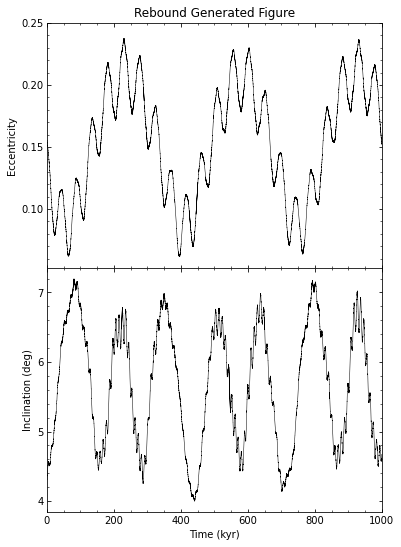

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (6,9))
ax1.plot(ts, eccentricities, lw = .5, c = 'k')
ax1.set_ylabel("Eccentricity")
ax1.set_yticks([0.1, 0.15, 0.2, 0.25])
ax1.minorticks_on()
ax1.tick_params(which='both', direction = 'in', top=True, right=True)

ax2.minorticks_on()
ax2.tick_params(which='both', direction = 'in', top=True, right=True)
ax2.plot(ts, inclinations, lw = .5, c = 'k')
ax2.set_yticks([4, 5, 6, 7])
ax2.set_ylabel('Inclination (deg)')
ax2.set_xlabel('Time (kyr)')
plt.subplots_adjust(hspace=0)
ax1.set_title("Rebound Generated Figure")
plt.xlim(0, 1e3)
#plt.savefig('../figures/Flora_1Myr_fig2_repro.pdf')

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

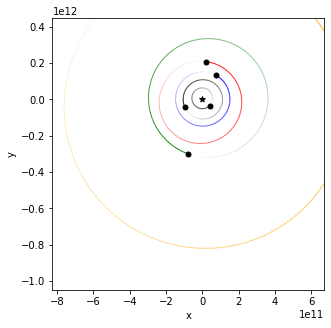

In [24]:
from src.utilities.misc import pm
xlim = pm(ps['Flora'].x, 5*au2m)
ylim = pm(ps['Flora'].y, 5*au2m)
rebound.OrbitPlot(sim, xlim=xlim, ylim=ylim, plotparticles=[1, 2, 3, 4, 5, "Flora"], color=['black', 'black', 'blue', 'red', 'orange', 'green'])

In [45]:
times = np.linspace(sim.t, sim.t+1*sec2year, 200)
ds = []
start = datetime.now()
for t in times:
    sim.integrate(t)
    ps = sim.particles
    d2mars = normDif(ps['Mars'].xyz, ps['Flora'].xyz)
    ds.append(d2mars)
end = datetime.now()
end-start

datetime.timedelta(seconds=7, microseconds=47926)

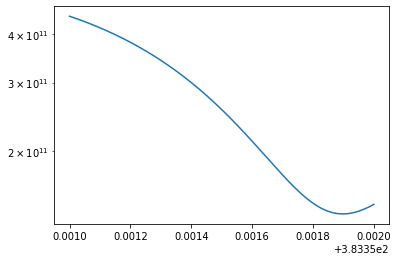

In [46]:
plt.semilogy(times/sec2year/1e3, ds)

In [15]:
pwd

'/Users/bethclark/Projects/Flora_Family/notebooks'

In [53]:
sim.dt/ps[1].P

1.3913700660838355e-05